In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from imutils import paths
import argparse

In [8]:
def rgb2hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0

    cmax = max(r, g, b)
    cmin = min(r, g, b)
    delta = cmax - cmin

    # Calculate hue
    if delta == 0:
        h = 0
    elif cmax == r:
        h = ((g - b) / delta) % 6
    elif cmax == g:
        h = ((b - r) / delta) + 2
    else:
        h = ((r - g) / delta) + 4

    h = round(h * 60)

    # Calculate saturation
    s = 0 if cmax == 0 else round((delta / cmax) * 100)

    # Calculate value
    v = round(cmax * 100)

    return h, s, v

In [9]:
def maxhistogram(pix) :
    value1 = [pixel[0] for sublist in pix for pixel in sublist]
    value2 = [pixel[1] for sublist in pix for pixel in sublist]
    value3 = [pixel[2] for sublist in pix for pixel in sublist]

    n1, bins1, patches1 = plt.hist(value1, bins=100, color='red', edgecolor='black')
    mode_index1 = n1.argmax()
    mode1= (bins1[mode_index1] + bins1[mode_index1+1])/2

    n2, bins2, patches2 = plt.hist(value2, bins=100, color='green', edgecolor='black')
    mode_index2 = n2.argmax()
    mode2= (bins2[mode_index2] + bins2[mode_index2+1])/2

    n3, bins3, patches3 = plt.hist(value3, bins=100, color='blue', edgecolor='black')
    mode_index3 = n3.argmax()
    mode3= (bins3[mode_index3] + bins3[mode_index3+1])/2
    
    return [round(mode1,3),round(mode2,3),round(mode3,3)]

In [10]:
def read_images_from_folders(root_folder, exclude_folders=None):
    images = []
    valid_image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

    if exclude_folders is None:
        exclude_folders = set()

    for folder_name in os.listdir(root_folder):
        if folder_name not in exclude_folders and os.path.isdir(os.path.join(root_folder, folder_name)):
            folder_path = os.path.join(root_folder, folder_name)
            
            for filename in os.listdir(folder_path):
                if any(filename.lower().endswith(ext) for ext in valid_image_extensions):
                    image_path = os.path.join(folder_path, filename)
                    img = cv2.imread(image_path)
                    # Calculate the new dimensions based on the percentage scale
                    scale_percent = 50
                    width = int(img.shape[1] * scale_percent / 100)
                    height = int(img.shape[0] * scale_percent / 100)
                    new_dimensions = (width, height)

                    # Resize the image
                    img = cv2.resize(img, new_dimensions, interpolation=cv2.INTER_AREA)
                    

                    if img is not None:
                        images.append((folder_name, filename, img))

    return images

[1.785, 0.44, 99.5]
[1.275, 1.275, 253.725]
[1.76, 0.5, 0.5]
[1.27, 1.275, 1.275]
[1.755, 0.415, 0.5]
[1.265, 1.27, 1.27]
[166.5, 0.5, 0.465]
[1.005, 1.185, 0.9]
[1.5, 0.495, 0.465]
[1.01, 1.19, 0.845]
[166.5, 0.5, 0.5]
[1.11, 1.27, 0.905]
[1.78, 0.43, 0.5]
[1.265, 1.27, 1.27]
[1.785, 0.4, 0.5]
[1.265, 1.27, 1.265]
[1.785, 0.375, 0.5]
[1.27, 1.27, 1.27]
[1.77, 0.5, 0.485]
[1.11, 1.185, 1.24]
[1.76, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.75, 0.5, 0.5]
[1.275, 1.275, 1.275]
[260.475, 0.5, 99.5]
[251.175, 1.27, 1.27]
[266.71, 0.5, 99.5]
[253.725, 1.27, 1.27]
[1.65, 0.5, 0.5]
[1.275, 1.27, 1.27]
[1.785, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.785, 0.5, 0.5]
[1.27, 1.265, 1.145]
[1.785, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.775, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.78, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.775, 0.5, 0.5]
[1.27, 1.265, 1.22]
[1.795, 0.5, 0.49]
[1.25, 1.18, 1.25]
[1.79, 0.5, 0.5]
[1.12, 1.135, 1.27]
[1.7, 0.5, 0.5]
[1.025, 1.255, 1.27]
[1.795, 0.5, 0.5]
[1.27, 1.27, 1.27]
[1.78, 4.84, 0.5]
[1.24, 1.27, 1.26

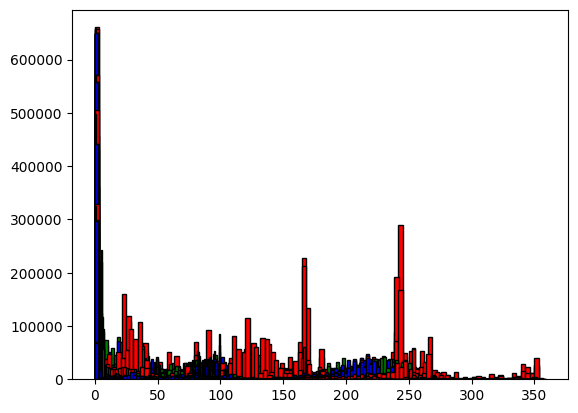

In [12]:
# Example usage:
parent_folder = r"C:\Users\raiva\OneDrive - Institut Teknologi Sepuluh Nopember\file laptop\D\VIVAT\ITS\7th Semester\DSEC\FP\image_recognition\Dataset\Train"  # Use r"..." for raw string on Windows
exclude ='tolak_angin'

try:
    file_list = read_images_from_folders(parent_folder, exclude)

    # Now file_list contains a list of paths to all files in every subfolder.
    # You can iterate through the list and perform further processing on each file.
    for foldername, filename, img in file_list:
        x,y,z = img.shape
        hsv_color = np.zeros((x, y, z), dtype=np.float32)
        rgb_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for i in range(x):
            for j in range(y):
                hsv_color[i, j] = rgb2hsv(*img[i, j])
        print(maxhistogram(hsv_color))
        print(maxhistogram(rgb_color))
        

except Exception as e:
    print(f"An error occurred: {e}")